# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS1
Not on Simbad

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [20]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Ill-formed Fit problem - number of variable parameters exceeds number of bins
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [26]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS1_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.387e-03 +/- 4.972e-04 (35.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-67
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.818e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020137_SRCNUM21_EMOS1_background_spectrum.fits
  Background Exposure Time: 1.818e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS1.arf


Fit statistic  : C-Statistic              2.683215e+07     using 67 bins.

Test statistic : Chi-Squared              7.624794e+12     using 67 bins.
 Null hypothesis probability of 0.

In [22]:
n_cts = 1.387e-03*1.818e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 25.21566

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [27]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

***Warning: Fit is not current.
     5 channels (1-5) ignored in spectrum #     1
    56 channels (12,67) ignored in spectrum #     1

Fit statistic  : C-Statistic                58508.51     using 6 bins.

Test statistic : Chi-Squared              1.970677e+08     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.



(-0.5, 856.5, 656.5, -0.5)

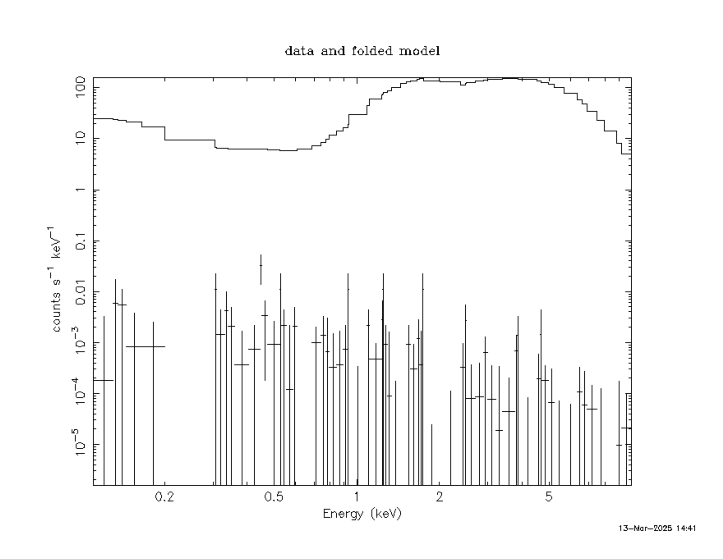

In [28]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [29]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                32346.46     using 6 bins.

Test statistic : Chi-Squared              6.185933e+07     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
8.46122      6946.77      -3      0.489653       196.956      0.118648
8.45865      0.00331621   -4     0.0353389       199.296     0.0306858
8.45791      0.00169008   -5    0.00420900       81.3644    0.00444856
8.4501

(-0.5, 856.5, 662.5, -0.5)

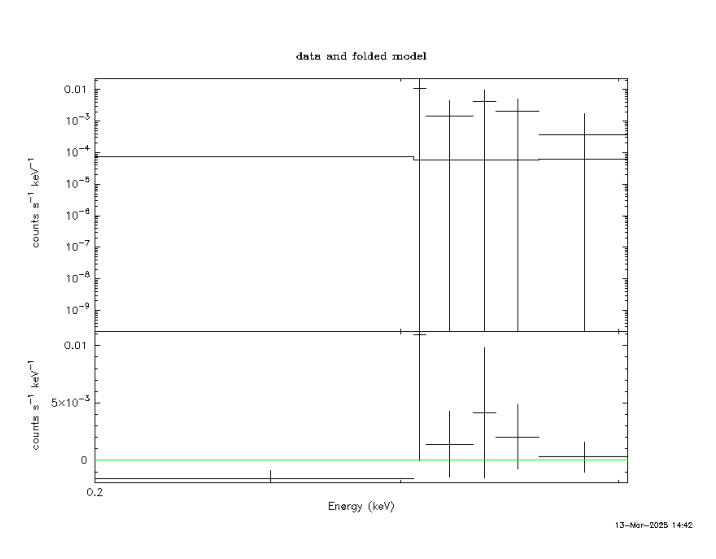

In [31]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [32]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                12493.75     using 6 bins.

Test statistic : Chi-Squared              8.652910e+06     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
10658.5      2479.8       -3      0.238525       199.054      0.337702
9668.89      12064.7      -4     0.0420242       76.5039     0.0401771
8.46282      45134.5      -5       303.316       7.11502     0.0198197
8.459

(-0.5, 854.5, 657.5, -0.5)

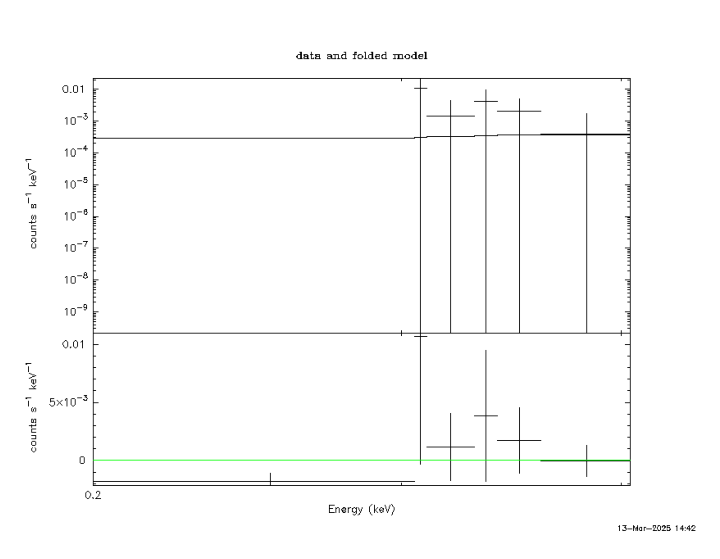

In [33]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [35]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                5225.902     using 6 bins.

Test statistic : Chi-Squared              1.622602e+06     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
8.45878      1603.88      -3       399.816      0.463909       129.272
8.45873      0.00012570

(-0.5, 856.5, 659.5, -0.5)

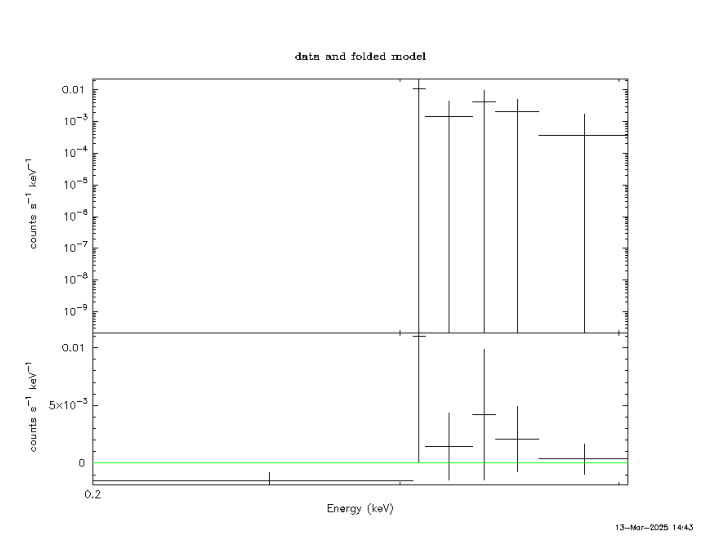

In [36]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [37]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                26082.22     using 6 bins.

Test statistic : Chi-Squared              3.817248e+07     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.45873      6125.74       0       852.452       6.96694      0.459267
8.45873      7.56862e-10  -1       222.069       9.00534      0.127295
 Variances and Principal Axes
                 1        2        3  
 6.69

(-0.5, 854.5, 657.5, -0.5)

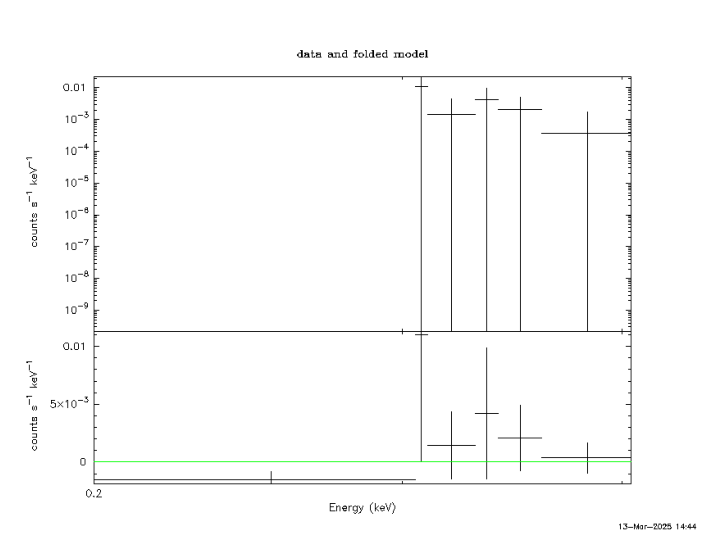

In [38]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
X-ray binaries

In [39]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                58508.51     using 6 bins.

Test statistic : Chi-Squared              1.970677e+08     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
43517.8      5753.61      

(-0.5, 851.5, 660.5, -0.5)

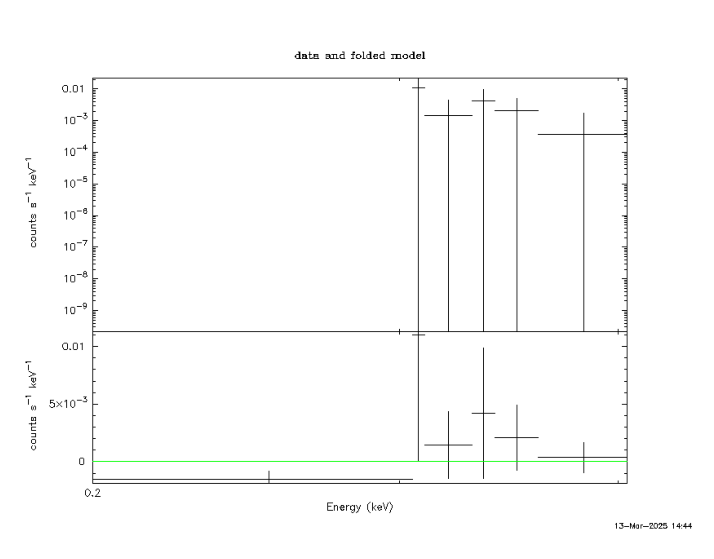

In [40]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw2.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 3*10^20 cm^-2 ?

In [43]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 2627089275614.3223

bremss
(tbabs) : 3.488129492494318e+23

apec
(tbabs) : 3.8919868920831506e+23

powerlaw
(tbabs) : 2.2206881378644586e+24

bbody+powerlaw
(tbabs) : 9.99999011504715e+27


## Flux
### X-ray flux

In [44]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.7499e-19 photons (1.988e-27 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [45]:
Flux = 1.988e-27 # ergs/cm^2/s
print(color.BOLD+"X-ray  flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray  flux : F_X = 1.988e-27 ergs/cm^2/s


### Optical flux

In [46]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical  flux (lower limit) : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux (lower limit) : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [47]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 3.6076722926770755e-14
F_x-ray = 3.6076722926770755e-14*F_optical


## Luminosity
No distance available on ESASky.

In [48]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [237866698682.3096, 2.3786669868230957e+17] erg/s
For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [2.378666986823096e+23, 2.378666986823096e+31] erg/s


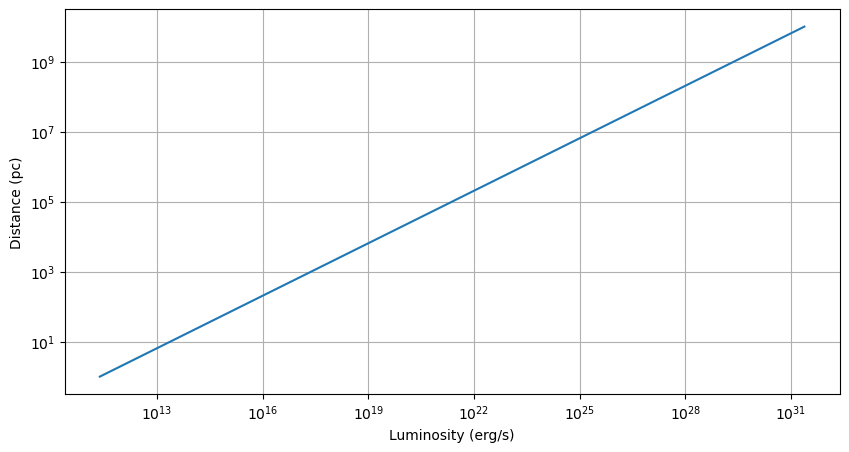

In [49]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()